In [7]:
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [3]:
cunami = pd.read_csv('C://Users/alex1/Downloads/tsunami_dataset.csv')
cunami.head()


,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS
0,12,-330,NaN,NaN,NaN,NaN,40.00,25.000,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,...,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"330 B.C. Aegean Sea, Sporades Islands, 40 N 25..."
1,481,1764,2.0,11.0,NaN,NaN,51.45,-2.583,"BRISTOL, ENGLAND",UK,...,Unknown,Very Doubtful Tsunami,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"Reference #1894, in full: ""On Saturday the 11t..."
2,71,859,NaN,NaN,NaN,NaN,36.08,36.250,SAMANDAGI,TURKEY,...,Earthquake,Questionable Tsunami,NaN,NaN,3.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"859 (possibly 861), November. Levantian Sea, N..."
3,186,1580,1.0,NaN,NaN,NaN,40.00,128.000,YELLOW SEA,NORTH KOREA,...,Unknown,Very Doubtful Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...
4,5,-1300,NaN,NaN,NaN,NaN,39.96,26.240,"IONIAN COASTS, TROAD",TURKEY,...,Unknown,Questionable Tsunami,6.0,NaN,5.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,1300 B.C. Ionian and Aegean Seas. References t...


<AxesSubplot: >

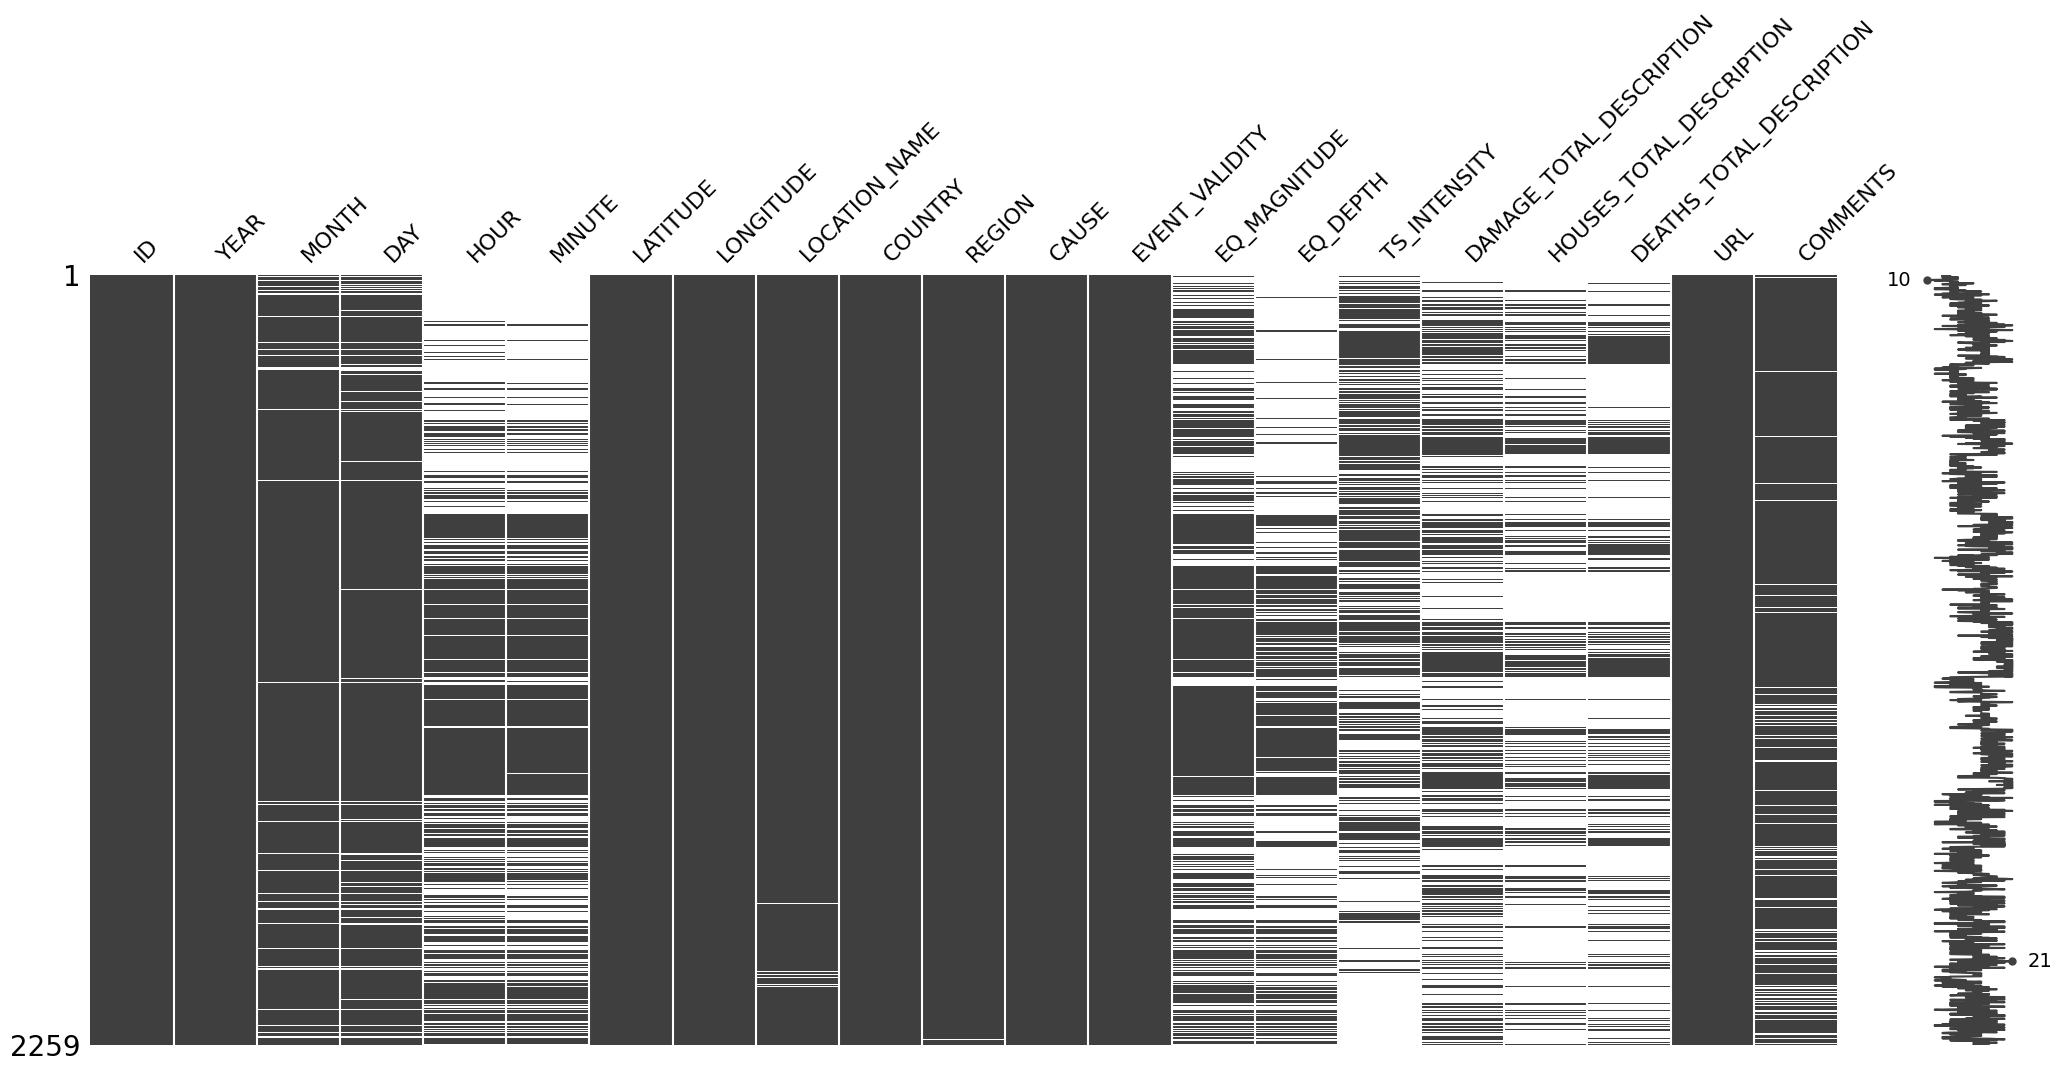

In [4]:
msn.matrix(cunami)
#построил матрицу Null значений

In [5]:
cunami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2259 non-null   int64  
 1   YEAR                      2259 non-null   int64  
 2   MONTH                     2155 non-null   float64
 3   DAY                       2082 non-null   float64
 4   HOUR                      1308 non-null   float64
 5   MINUTE                    1235 non-null   float64
 6   LATITUDE                  2259 non-null   float64
 7   LONGITUDE                 2259 non-null   float64
 8   LOCATION_NAME             2250 non-null   object 
 9   COUNTRY                   2259 non-null   object 
 10  REGION                    2258 non-null   object 
 11  CAUSE                     2258 non-null   object 
 12  EVENT_VALIDITY            2259 non-null   object 
 13  EQ_MAGNITUDE              1474 non-null   float64
 14  EQ_DEPTH

In [4]:
for column in cunami.columns:
    nan_count = cunami[column].isnull().sum()
    total_count = len(cunami[column])
    percentage = nan_count/total_count*100
    print(f'Процент NaN значений в столбце {column} равен {percentage}%')
# вывод процента пропущеннных значений по столбцам  

Процент NaN значений в столбце ID равен 0.0%
Процент NaN значений в столбце YEAR равен 0.0%
Процент NaN значений в столбце MONTH равен 4.603806994245241%
Процент NaN значений в столбце DAY равен 7.835325365205843%
Процент NaN значений в столбце HOUR равен 42.09827357237716%
Процент NaN значений в столбце MINUTE равен 45.32979194333776%
Процент NaN значений в столбце LATITUDE равен 0.0%
Процент NaN значений в столбце LONGITUDE равен 0.0%
Процент NaN значений в столбце LOCATION_NAME равен 0.398406374501992%
Процент NaN значений в столбце COUNTRY равен 0.0%
Процент NaN значений в столбце REGION равен 0.04426737494466578%
Процент NaN значений в столбце CAUSE равен 0.04426737494466578%
Процент NaN значений в столбце EVENT_VALIDITY равен 0.0%
Процент NaN значений в столбце EQ_MAGNITUDE равен 34.74988933156264%
Процент NaN значений в столбце EQ_DEPTH равен 59.84949092518813%
Процент NaN значений в столбце TS_INTENSITY равен 51.26162018592297%
Процент NaN значений в столбце DAMAGE_TOTAL_DESCRI

In [40]:
cunami = cunami.drop(['HOUSES_TOTAL_DESCRIPTION','DEATHS_TOTAL_DESCRIPTION'],axis = 1)
#удалил столбцы, с пропусками, более 60 процентов

In [45]:
map_ = folium.Map(location=[0.78, 113.92], tiles='openstreetmap', zoom_start=4.8)

for i in range(0,len(cunami)):
    Circle(
        location=[cunami.iloc[i]['LATITUDE'], cunami.iloc[i]['LONGITUDE']],
        radius=20000,
        color='green').add_to(map_)

#map_.save('C:\map.html')
#Этот код использует библиотеку Folium для создания интерактивной карты с использованием открытых данных OpenStreetMap.
#В начале кода создается объект карты с указанными координатами центра и масштабом. Затем, в цикле, для каждой строки в датафрейме `cunami` добавляется круг на карте.
#Круги располагаются в координатах, указанных в столбцах 'LATITUDE' и 'LONGITUDE' каждой строки, имеют радиус 20000 метров и зеленый цвет. В конце кода, возвращается объект карты.

In [43]:
cunami.columns

Index(['ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'LATITUDE', 'LONGITUDE',
       'LOCATION_NAME', 'COUNTRY', 'REGION', 'CAUSE', 'EVENT_VALIDITY',
       'EQ_MAGNITUDE', 'EQ_DEPTH', 'TS_INTENSITY', 'DAMAGE_TOTAL_DESCRIPTION',
       'URL', 'COMMENTS'],
      dtype='object')

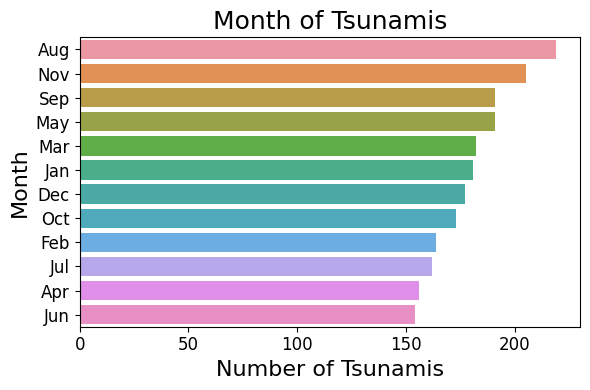

In [46]:
plt.figure(figsize=(6,4))
month_idxs = np.array(list(map(lambda x: int(x), df["MONTH"].value_counts().keys().tolist())))-1
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = list(map(month_names.__getitem__, month_idxs))
ax = sns.countplot(y="MONTH", data=df, order=df["MONTH"].value_counts().index)
ax.axes.set_title("Month of Tsunamis",fontsize=18)
ax.set_xlabel("Number of Tsunamis",fontsize=16)
ax.set_ylabel("Month",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(months, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

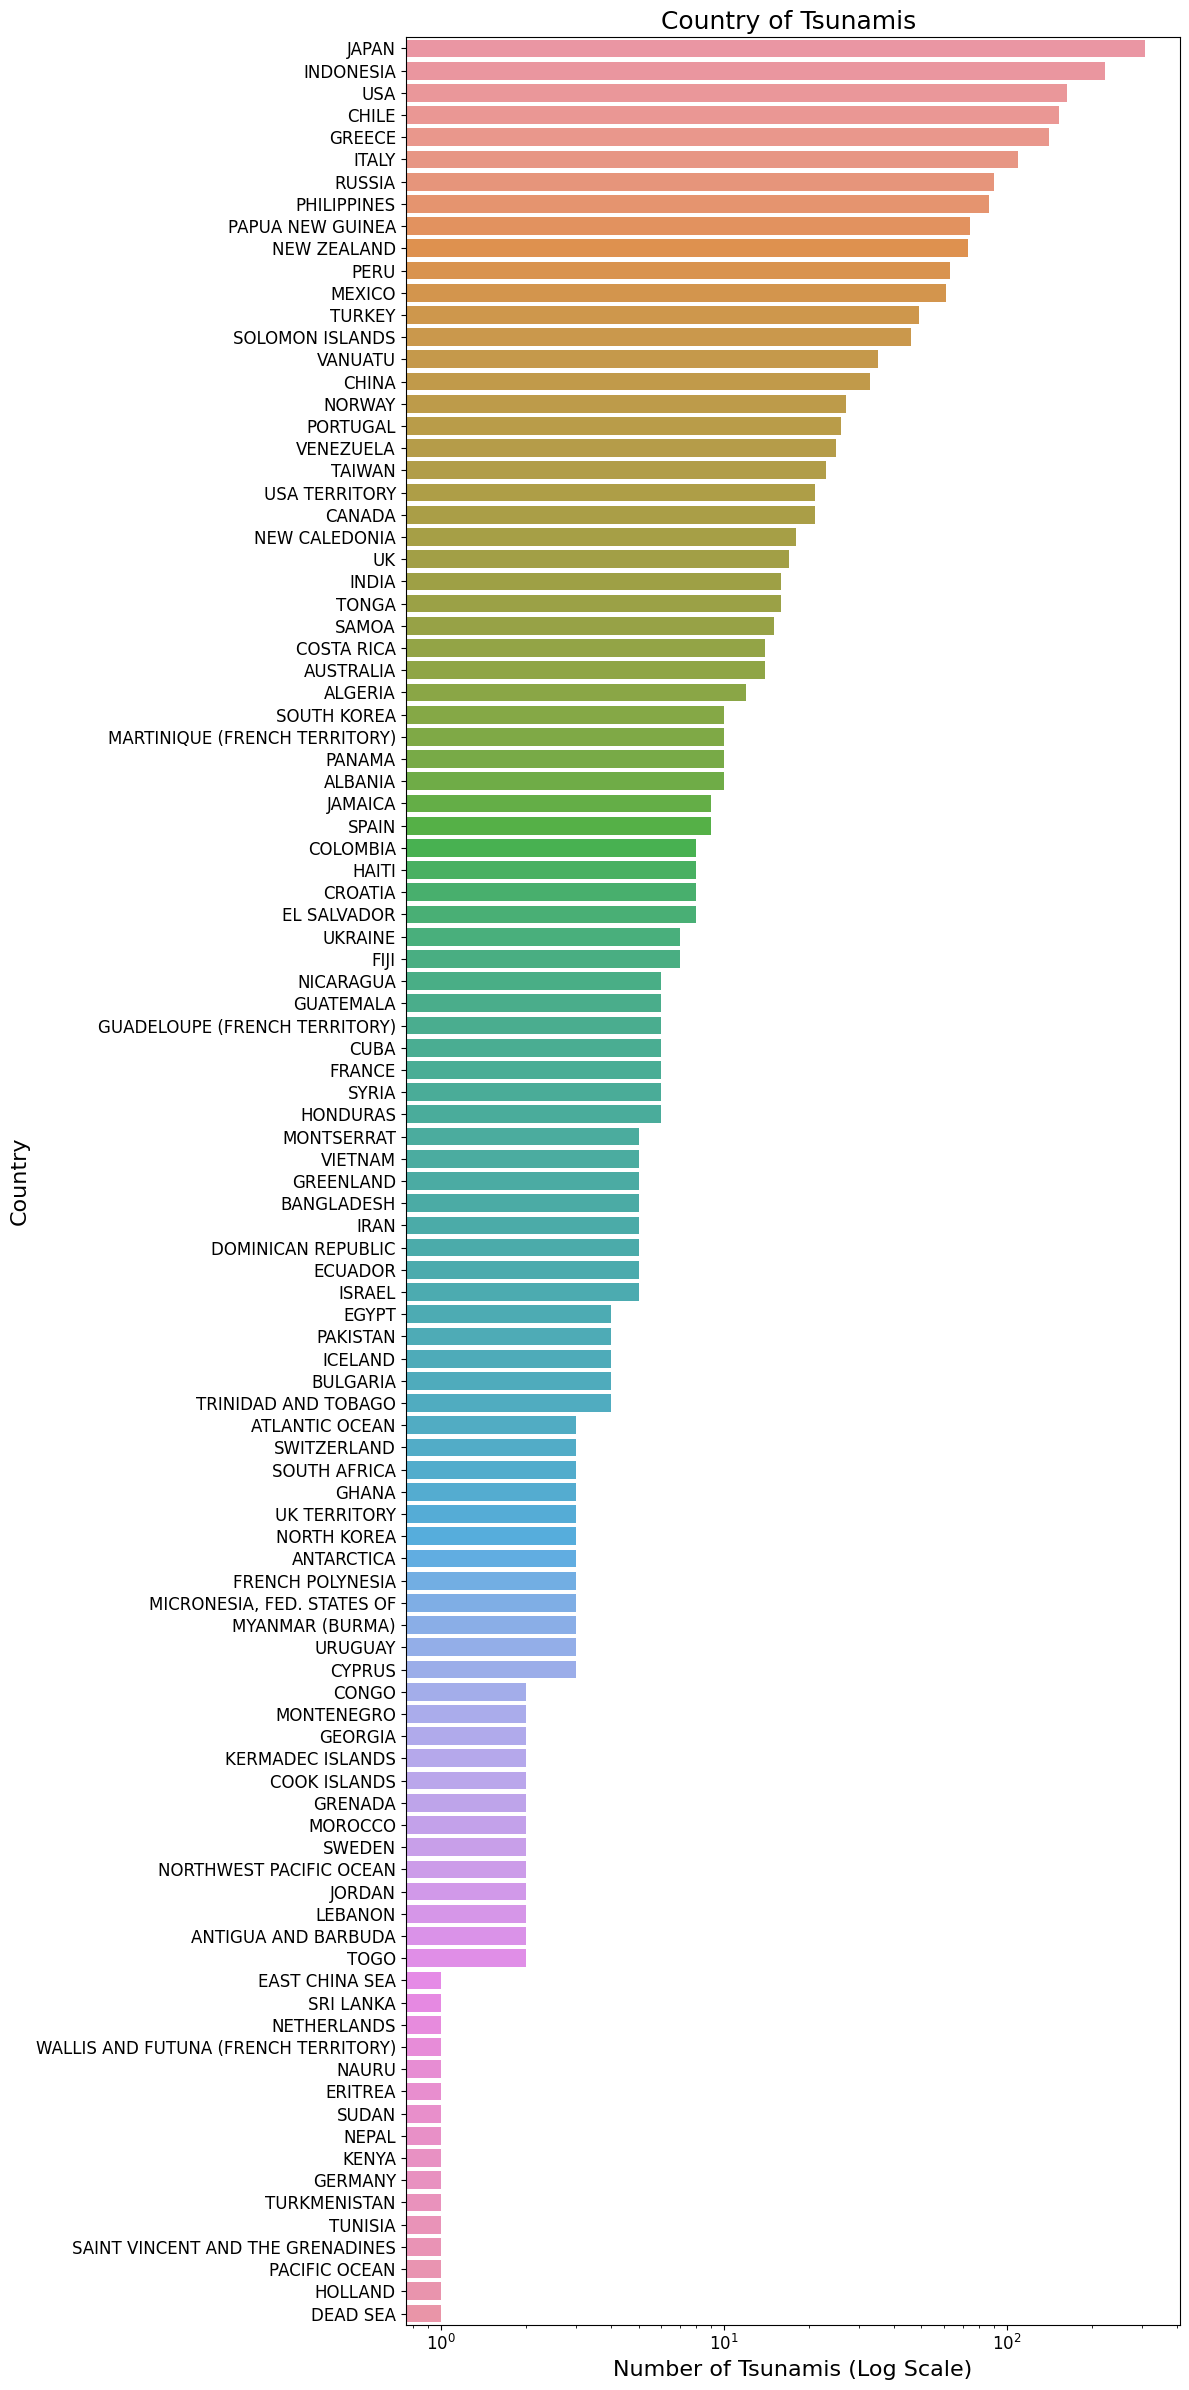

In [62]:
plt.figure(figsize=(12,24))
countries = list(map(lambda x: x.title(), df["COUNTRY"].value_counts().keys().tolist()))
ax = sns.countplot(y="COUNTRY", data=df, order=df["COUNTRY"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country of Tsunamis ",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

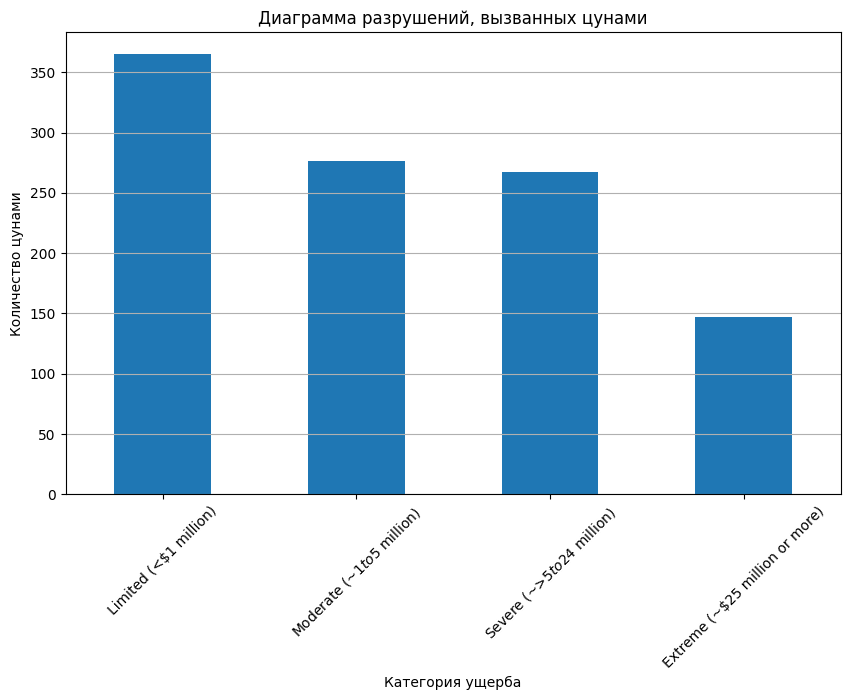

In [48]:
damage_count = df['DAMAGE_TOTAL_DESCRIPTION'].value_counts()

# Создание диаграммы
plt.figure(figsize=(10, 6))
damage_count.plot(kind='bar')
plt.title('Диаграмма разрушений, вызванных цунами')
plt.xlabel('Категория ущерба')
plt.ylabel('Количество цунами')
plt.xticks(rotation=45)  # Поворот подписей по оси x для удобства чтения
plt.grid(axis='y')  # Добавление сетки по оси y
plt.show()

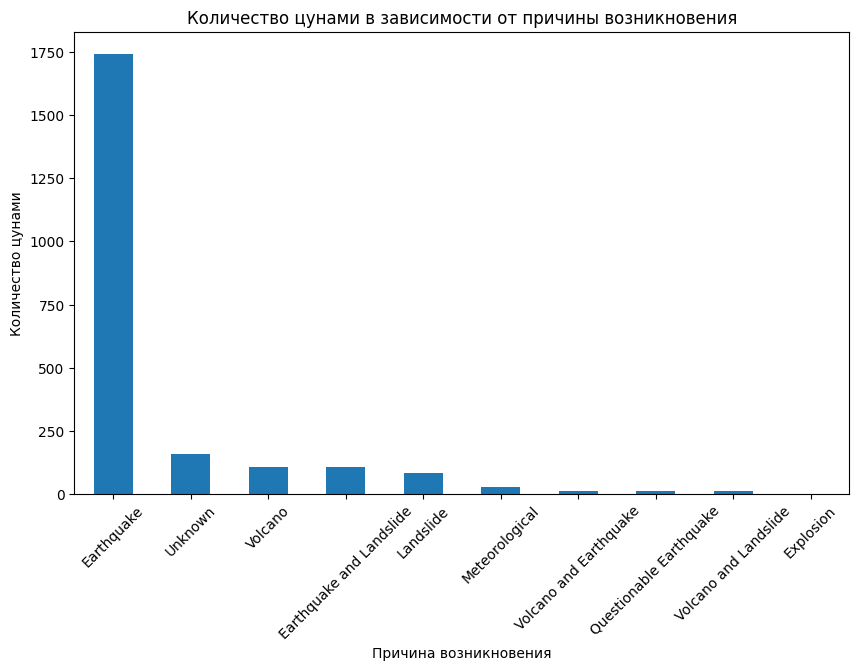

In [49]:
tsunami_count = df['CAUSE'].value_counts()

# Создание графика
plt.figure(figsize=(10, 6))
tsunami_count.plot(kind='bar')
plt.xlabel('Причина возникновения')
plt.ylabel('Количество цунами')
plt.title('Количество цунами в зависимости от причины возникновения')
plt.xticks(rotation=45)

# Отображение графика
plt.show()

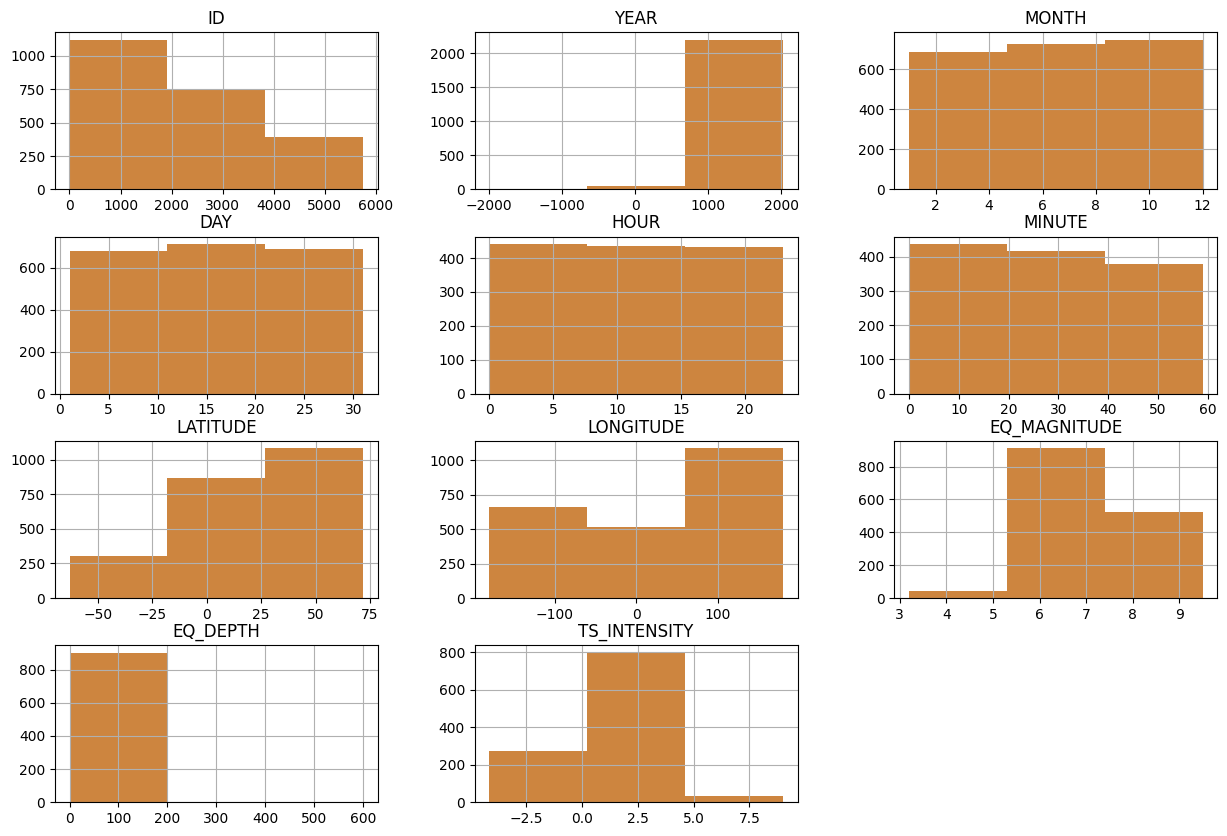

In [50]:
df.hist(bins=3,figsize=(15,10),color='peru')
plt.show()

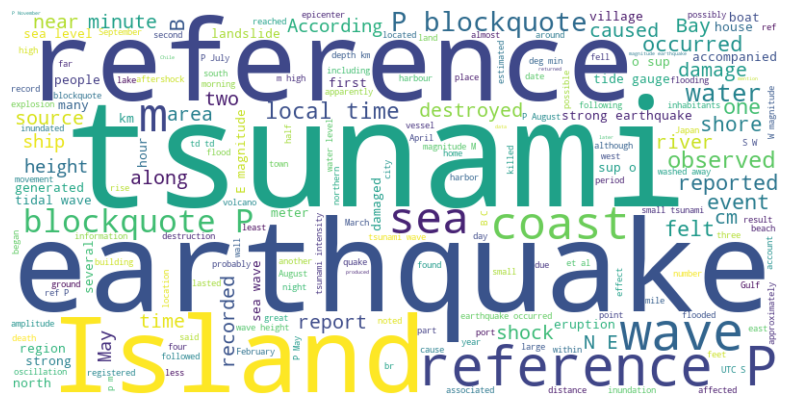

In [51]:
from wordcloud import WordCloud
all_comments = ' '.join(df['COMMENTS'].astype(str))

# Создание объекта wordcloud и генерация облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Визуализация облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

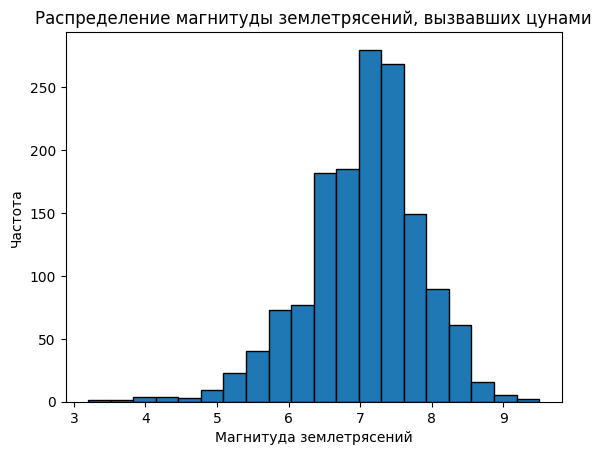

In [52]:
magnitude = df['EQ_MAGNITUDE']

# Создание гистограммы распределения магнитуды землетрясений
plt.hist(magnitude, bins=20, edgecolor='black')

# Настройка осей и заголовка графика
plt.xlabel('Магнитуда землетрясений')
plt.ylabel('Частота')
plt.title('Распределение магнитуды землетрясений, вызвавших цунами')

# Показать график
plt.show()

In [57]:
df.columns

Index(['ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'LATITUDE', 'LONGITUDE',
       'LOCATION_NAME', 'COUNTRY', 'REGION', 'CAUSE', 'EVENT_VALIDITY',
       'EQ_MAGNITUDE', 'EQ_DEPTH', 'TS_INTENSITY', 'DAMAGE_TOTAL_DESCRIPTION',
       'HOUSES_TOTAL_DESCRIPTION', 'DEATHS_TOTAL_DESCRIPTION', 'URL',
       'COMMENTS'],
      dtype='object')

In [58]:
df[df['YEAR'] == min(df['YEAR'])][['YEAR','LONGITUDE','CAUSE','EVENT_VALIDITY','TS_INTENSITY','DEATHS_TOTAL_DESCRIPTION','DEATHS_TOTAL_DESCRIPTION','COMMENTS']]

,YEAR,LONGITUDE,CAUSE,EVENT_VALIDITY,TS_INTENSITY,DEATHS_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,COMMENTS
197,-2000,35.8,Earthquake,Very Doubtful Tsunami,6.0,Many (~101 to 1000 people),Many (~101 to 1000 people),Second millennium B.C.\r\n<br>According to exc...


In [61]:
df[df['YEAR'] == max(df['YEAR'])][['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE','LONGITUDE','CAUSE','EVENT_VALIDITY','TS_INTENSITY','DEATHS_TOTAL_DESCRIPTION','DEATHS_TOTAL_DESCRIPTION','COMMENTS']]

,YEAR,MONTH,DAY,HOUR,MINUTE,LONGITUDE,CAUSE,EVENT_VALIDITY,TS_INTENSITY,DEATHS_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,COMMENTS
2241,2020,1.0,7.0,8.0,24.0,-66.813,Earthquake,Definite Tsunami,NaN,Few (~1 to 50 people),Few (~1 to 50 people),The earthquake of magnitude 6.4 of 7 January 2...
2246,2020,1.0,28.0,19.0,10.0,-78.755,Earthquake,Definite Tsunami,NaN,NaN,NaN,NaN
2249,2020,3.0,25.0,2.0,49.0,157.693,Earthquake,Definite Tsunami,NaN,NaN,NaN,The earthquake generated a ~0.50 m tsunami tha...
2252,2020,5.0,2.0,12.0,51.0,25.712,Earthquake,Definite Tsunami,NaN,NaN,NaN,A tsunami occurred a few hours ago in Ierapetr...
2253,2020,5.0,29.0,5.0,30.0,114.242,Volcano and Earthquake,Event that only caused a seiche or disturbance...,NaN,Few (~1 to 50 people),Few (~1 to 50 people),A sulfur miner was killed when volcanic activi...
2254,2020,7.0,22.0,6.0,12.0,-158.522,Earthquake,Definite Tsunami,NaN,NaN,NaN,NaN
2255,2020,6.0,18.0,12.0,49.0,-177.838,Earthquake,Definite Tsunami,NaN,NaN,NaN,A small tsunami (12 cm) occurred today followi...
2258,2020,6.0,23.0,15.0,29.0,-95.901,Earthquake,Definite Tsunami,NaN,Few (~1 to 50 people),Few (~1 to 50 people),NaN
